Для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flight_delays.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


# Task 1
Доля всех задержек ко всем вылетам

In [3]:
df.value_counts(subset = 'dep_delayed_15min')

dep_delayed_15min
N    80956
Y    19044
Name: count, dtype: int64

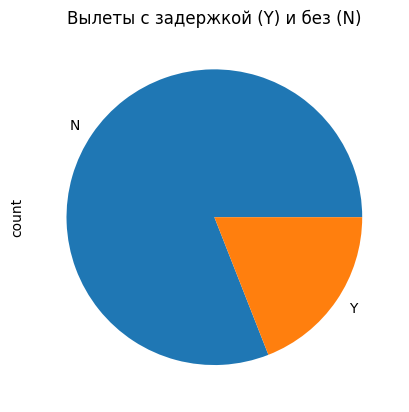

In [5]:
df.value_counts(subset = 'dep_delayed_15min').plot.pie(title = 'Вылеты с задержкой (Y) и без (N)');

# Task 2
Зависимость количества задержек от длины пути, который предстоит пролететь самолету

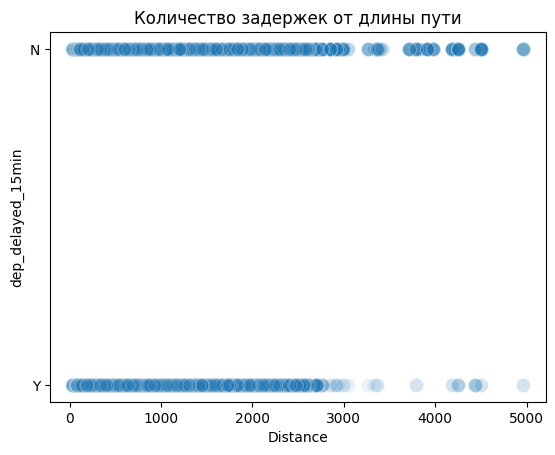

In [12]:
sns.scatterplot(data = df, x = 'Distance', y = 'dep_delayed_15min', s = 100, alpha = 0.1)
plt.title('Количество задержек от длины пути');

*В общем, нет зависимости*

# Task 3
Топ 5 направлений, для которых чаще всего происходят задержки

In [25]:
ans = (
    df
    .groupby('Dest')
    .agg({'dep_delayed_15min':'value_counts'})
).drop('N', level='dep_delayed_15min').rename(columns = {'dep_delayed_15min':'delays'}
                                             ).sort_values('delays', ascending=False).head(5)

ans

,,delays
Dest,dep_delayed_15min,
ATL,Y,1281
ORD,Y,1072
DFW,Y,656
EWR,Y,584
LAX,Y,525


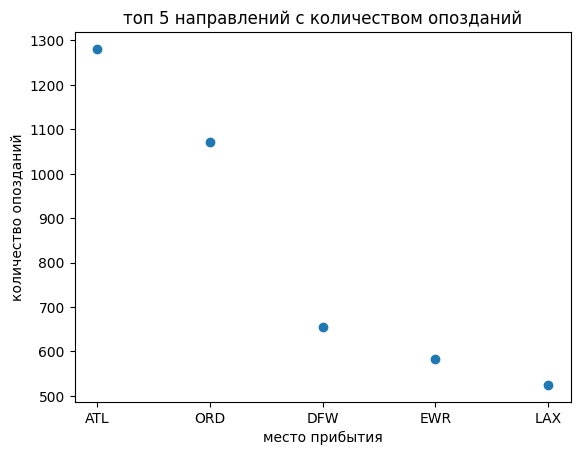

In [53]:
plt.title('топ 5 направлений с количеством опозданий')
plt.xlabel('место прибытия')
plt.ylabel('количество опозданий')
plt.scatter(x=ans.index.get_level_values('Dest'), y=ans['delays']);

# Task 4
В какие времена года чаще всего происходят задержки рейсов

In [47]:
df['Month'] = df['Month'].str.replace('c-', '').astype(int)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,4,c-20,c-3,1548,US,PIT,MCO,834,N
2,9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [50]:
df2 = (
    df
    .groupby('Month')
    .agg({'dep_delayed_15min':'value_counts'})
).drop('N', level='dep_delayed_15min').rename(columns = {'dep_delayed_15min':'delays'}
                                             ).sort_values('Month')

df2

,,delays
Month,dep_delayed_15min,
1,Y,1539
2,Y,1316
3,Y,1676
4,Y,1306
5,Y,1313
6,Y,1867
7,Y,2073
8,Y,1783
9,Y,1279


''

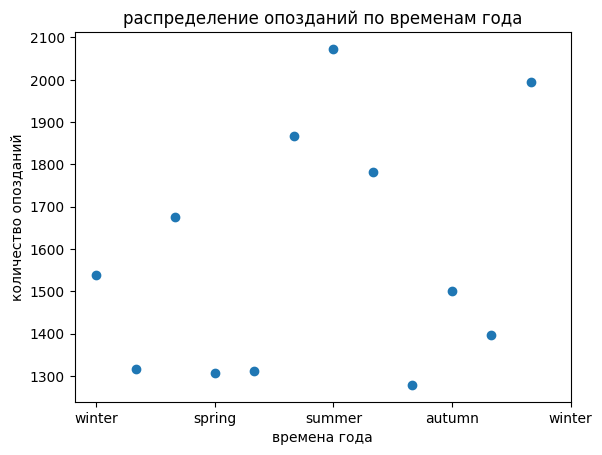

In [57]:
fig,ax = plt.subplots()
ax.set_title('распределение опозданий по временам года')
ax.set_xlabel('времена года')
ax.set_ylabel('количество опозданий')
ax.scatter(x=df2.index.get_level_values('Month'), y=df2['delays']);

ax.set_xticks(np.arange(1,14,3))
xticklabels = ['winter','spring', 'summer', 'autumn', 'winter']
ax.set_xticklabels(xticklabels)
;

*В общем, летом чаще всего опаздывают, а в конце лета и осени меньше всего*

# Task 5
Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [58]:
ans = (
    df
    .groupby('UniqueCarrier')
    .agg({'dep_delayed_15min':'value_counts'})
).drop('N', level='dep_delayed_15min').rename(columns = {'dep_delayed_15min':'delays'}
                                             ).sort_values('delays').head(10)

ans

,,delays
UniqueCarrier,dep_delayed_15min,
AQ,Y,18
HA,Y,33
TZ,Y,64
DH,Y,156
F9,Y,156
HP,Y,196
B6,Y,393
YV,Y,478
AS,Y,541


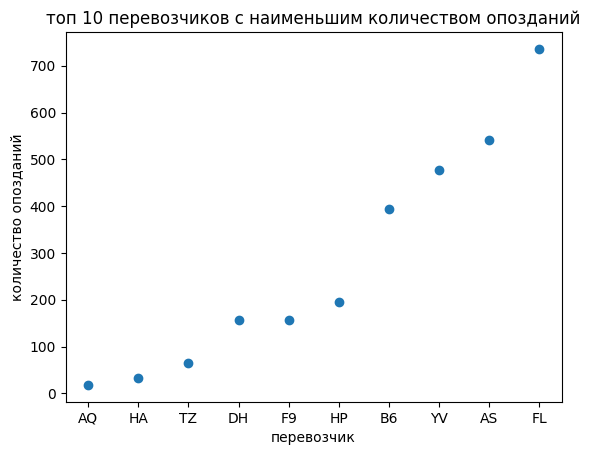

In [59]:
plt.title('топ 10 перевозчиков с наименьшим количеством опозданий')
plt.xlabel('перевозчик')
plt.ylabel('количество опозданий')
plt.scatter(x=ans.index.get_level_values('UniqueCarrier'), y=ans['delays']);

# Task 6
Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [60]:
ans = (
    df
    .groupby('Origin')
    .agg({'dep_delayed_15min':'value_counts'})
).drop('N', level='dep_delayed_15min').rename(columns = {'dep_delayed_15min':'delays'}
                                             ).sort_values('delays', ascending=False).head(10)

ans

,,delays
Origin,dep_delayed_15min,
ATL,Y,1506
ORD,Y,1254
DFW,Y,902
DEN,Y,575
LAX,Y,552
LAS,Y,546
EWR,Y,538
IAH,Y,492
PHX,Y,491


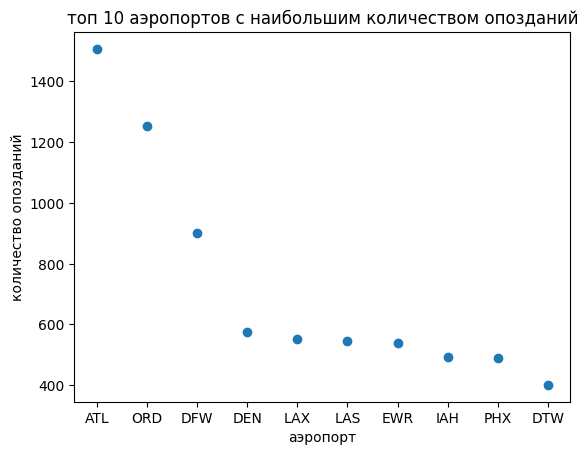

In [61]:
plt.title('топ 10 аэропортов с наибольшим количеством опозданий')
plt.xlabel('аэропорт')
plt.ylabel('количество опозданий')
plt.scatter(x=ans.index.get_level_values('Origin'), y=ans['delays']);

# Task 7
Необычная зависимость количества задержек от имеющихся данных

Количество опозданий от суммы 'DepTime' и 'Distance'

In [73]:
df['3rd']=np.round((df['DepTime']+df['Distance']), decimals=-2)
ans = (
    df
    .groupby('3rd')
    .agg({'dep_delayed_15min':'value_counts'})
).drop('N', level='dep_delayed_15min').rename(columns = {'dep_delayed_15min':'delays'}
                                             ).sort_values('delays')

ans

,,delays
3rd,dep_delayed_15min,
7300,Y,1
6300,Y,1
5600,Y,1
5500,Y,1
5400,Y,1
...,...,...
2500,Y,1208
2100,Y,1212
2300,Y,1225


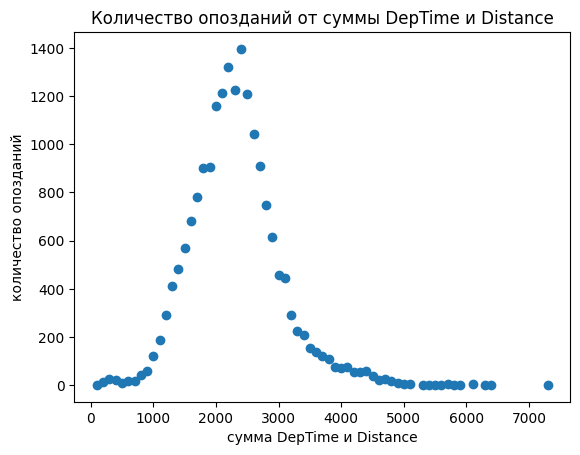

In [74]:
plt.title('Количество опозданий от суммы DepTime и Distance')
plt.xlabel('сумма DepTime и Distance')
plt.ylabel('количество опозданий')
plt.scatter(x=ans.index.get_level_values('3rd'), y=ans['delays']);